# WeatherPy - Aaron Wollman
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
sample_size = 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Function to call OpenWeatherMap's API
weather_baseurl = "http://api.openweathermap.org/data/2.5/weather?"

def get_city_weather(city):
    weather_params = {
        "appid" : weather_api_key,
        "q" : city,
        "units" : "Imperial"
    }
    
    weather_response = requests.get(weather_baseurl, params = weather_params)
    return weather_response.json()

In [4]:
# Helpers to save data from JSON to an object
class City_Weather_Columns:
    city = "City"
    lat = "Lat"
    lng = "Lng"
    max_temp = "Max Temp"
    humidity = "Humidity"
    cloudiness = "Cloudiness"
    wind_speed = "Wind Speed"
    country = "country"
    date = "Date"
       
def process_weather_json(json):
    return {
        City_Weather_Columns.city : json["name"],
        City_Weather_Columns.lat : json["coord"]["lat"],
        City_Weather_Columns.lng : json["coord"]["lon"],
        City_Weather_Columns.max_temp : json["main"]["temp_max"],
        City_Weather_Columns.humidity : json["main"]["humidity"],
        City_Weather_Columns.cloudiness : json["clouds"]["all"],
        City_Weather_Columns.wind_speed : json["wind"]["speed"],
        City_Weather_Columns.country : json["sys"]["country"],
        City_Weather_Columns.date : json["dt"]
    }

In [5]:
# Load the data from OpenWeatherMap into city_weather_list
print("Beginning Data Retrieval")
print("-----------------------------")

record_num = 1;
set_num = 1;
city_weather_list = []
for city in cities:
    
    try:
        city_weather_json = get_city_weather(city)     
        city_weather = process_weather_json(city_weather_json)
        city_name = city_weather[City_Weather_Columns.city]
        print(f"Processing Record {record_num} of Set {set_num} | {city_name}")
        city_weather_list.append(city_weather)
    except:
        print("City not found. Skipping...")
    
    # Keep Record Count; Sets of 50
    record_num += 1
    if(record_num > 50):
        set_num += 1
        record_num = 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Pitimbu
Processing Record 2 of Set 1 | Kenai
Processing Record 3 of Set 1 | Bowling Green
Processing Record 4 of Set 1 | New Norfolk
City not found. Skipping...
Processing Record 6 of Set 1 | Kavaratti
Processing Record 7 of Set 1 | Mahébourg
Processing Record 8 of Set 1 | Saint-Philippe
Processing Record 9 of Set 1 | Alofi
Processing Record 10 of Set 1 | Mataura
Processing Record 11 of Set 1 | Redlands
City not found. Skipping...
Processing Record 13 of Set 1 | Hobart
Processing Record 14 of Set 1 | Albany
Processing Record 15 of Set 1 | Hermanus
Processing Record 16 of Set 1 | Khatanga
Processing Record 17 of Set 1 | Codrington
Processing Record 18 of Set 1 | Qaanaaq
Processing Record 19 of Set 1 | Rundu
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 1 | Mudgal
Processing Record 23 of Set 1 | Carnarvon
Processing Record 24 of Set 1 | Stornoway
Processing Record 2

Processing Record 6 of Set 5 | San Patricio
Processing Record 7 of Set 5 | Nyimba
Processing Record 8 of Set 5 | Barrow
Processing Record 9 of Set 5 | San Rafael
Processing Record 10 of Set 5 | Najrān
Processing Record 11 of Set 5 | Longyearbyen
Processing Record 12 of Set 5 | Bocas del Toro
City not found. Skipping...
Processing Record 14 of Set 5 | Darnah
Processing Record 15 of Set 5 | Balikpapan
Processing Record 16 of Set 5 | Sambava
City not found. Skipping...
Processing Record 18 of Set 5 | Russell
Processing Record 19 of Set 5 | Talaya
Processing Record 20 of Set 5 | Hokitika
Processing Record 21 of Set 5 | Mandlā
Processing Record 22 of Set 5 | Okha
Processing Record 23 of Set 5 | Chokurdakh
Processing Record 24 of Set 5 | Phalombe
Processing Record 25 of Set 5 | Nchelenge
Processing Record 26 of Set 5 | Araouane
City not found. Skipping...
Processing Record 28 of Set 5 | Narsaq
Processing Record 29 of Set 5 | Zhongshu
City not found. Skipping...
Processing Record 31 of Set 5 

Processing Record 11 of Set 9 | Hirara
Processing Record 12 of Set 9 | Aklavik
Processing Record 13 of Set 9 | Lesnoye
Processing Record 14 of Set 9 | Thaba Nchu
Processing Record 15 of Set 9 | Port Hardy
Processing Record 16 of Set 9 | Kumluca
Processing Record 17 of Set 9 | Grand Gaube
Processing Record 18 of Set 9 | Matamoros
Processing Record 19 of Set 9 | Ancud
Processing Record 20 of Set 9 | Bellingham
Processing Record 21 of Set 9 | La Ronge
Processing Record 22 of Set 9 | Muzaffarabad
Processing Record 23 of Set 9 | Palāsbāri
Processing Record 24 of Set 9 | Kokopo
City not found. Skipping...
Processing Record 26 of Set 9 | Vestmannaeyjar
Processing Record 27 of Set 9 | Baleno
Processing Record 28 of Set 9 | Coyhaique
Processing Record 29 of Set 9 | Plettenberg Bay
Processing Record 30 of Set 9 | Buenos Aires
Processing Record 31 of Set 9 | Tānsen
Processing Record 32 of Set 9 | Bulgan
Processing Record 33 of Set 9 | Vangaindrano
Processing Record 34 of Set 9 | Pangody
Processin

Processing Record 12 of Set 13 | Umm Hājar
Processing Record 13 of Set 13 | Changping
Processing Record 14 of Set 13 | Westport
Processing Record 15 of Set 13 | Talara
Processing Record 16 of Set 13 | Mingora
Processing Record 17 of Set 13 | Lubumbashi
Processing Record 18 of Set 13 | Sittwe
Processing Record 19 of Set 13 | Tāybād
City not found. Skipping...
Processing Record 21 of Set 13 | Sosnovo
Processing Record 22 of Set 13 | Udachny
Processing Record 23 of Set 13 | Koróni
City not found. Skipping...
Processing Record 25 of Set 13 | Grand Forks
Processing Record 26 of Set 13 | Praia
Processing Record 27 of Set 13 | Belogorsk
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert to DataFrame
city_weather_df = pd.DataFrame(city_weather_list)
city_weather_df = city_weather_df.dropna()
city_weather_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
country       573
Date          573
dtype: int64

In [7]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,Date
0,Pitimbu,-7.47,-34.81,75.20,83,49,10.29,BR,1595626029
1,Kenai,60.55,-151.26,55.99,87,90,3.36,US,1595626029
2,Bowling Green,36.99,-86.44,84.20,66,90,8.05,US,1595625896
3,New Norfolk,-42.78,147.06,42.01,83,100,2.86,AU,1595626029
4,Kavaratti,10.57,72.64,80.01,85,100,17.96,IN,1595626008


In [8]:
# Save to CSV
city_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.783089,18.780960,69.406876,70.160558,48.450262,7.698028,1.595626e+09
std,32.635010,92.680525,14.464713,20.014559,38.720575,5.179000,6.479007e+01
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.290000,1.595626e+09
25%,-5.200000,-63.170000,57.200000,58.000000,6.000000,3.760000,1.595626e+09
50%,25.020000,26.400000,71.110000,75.000000,44.000000,6.710000,1.595626e+09
75%,48.220000,100.350000,80.010000,85.000000,90.000000,10.290000,1.595626e+09
max,78.220000,178.420000,105.460000,100.000000,100.000000,29.330000,1.595626e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
over_100_humid = city_weather_df.loc[city_weather_df[City_Weather_Columns.humidity] > 100].index
over_100_humid

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(over_100_humid)
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.783089,18.780960,69.406876,70.160558,48.450262,7.698028,1.595626e+09
std,32.635010,92.680525,14.464713,20.014559,38.720575,5.179000,6.479007e+01
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.290000,1.595626e+09
25%,-5.200000,-63.170000,57.200000,58.000000,6.000000,3.760000,1.595626e+09
50%,25.020000,26.400000,71.110000,75.000000,44.000000,6.710000,1.595626e+09
75%,48.220000,100.350000,80.010000,85.000000,90.000000,10.290000,1.595626e+09
max,78.220000,178.420000,105.460000,100.000000,100.000000,29.330000,1.595626e+09


In [12]:
# Extract relevant fields from the data frame
final_columns = [
                 City_Weather_Columns.city,
                 City_Weather_Columns.country,
                 City_Weather_Columns.lat, 
                 City_Weather_Columns.lng,
                 City_Weather_Columns.max_temp, 
                 City_Weather_Columns.humidity, 
                 City_Weather_Columns.cloudiness,
                 City_Weather_Columns.wind_speed]
final_city_data = clean_city_data[final_columns]
final_city_data.head()

,City,country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pitimbu,BR,-7.47,-34.81,75.20,83,49,10.29
1,Kenai,US,60.55,-151.26,55.99,87,90,3.36
2,Bowling Green,US,36.99,-86.44,84.20,66,90,8.05
3,New Norfolk,AU,-42.78,147.06,42.01,83,100,2.86
4,Kavaratti,IN,10.57,72.64,80.01,85,100,17.96


In [13]:
# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
def savefig(filename):
    plt.savefig(f"images/{filename}.png")

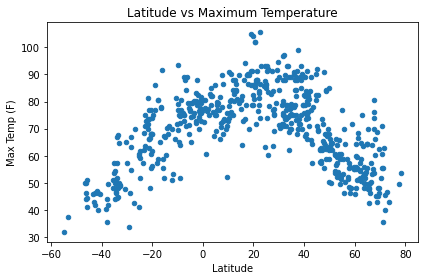

In [15]:
def plot_lat_v_temp(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.max_temp)
    plt.title("Latitude vs Maximum Temperature")
    plt.ylabel("Max Temp (F)")
    plt.xlabel("Latitude")

plot_lat_v_temp(final_city_data)
plt.tight_layout()
savefig("lat_v_temp")
plt.show()

## Latitude vs. Humidity Plot

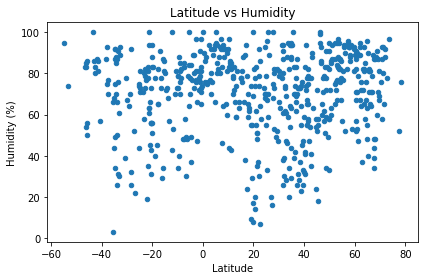

In [16]:
def plot_lat_v_humid(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.humidity)
    plt.title("Latitude vs Humidity")
    plt.ylabel("Humidity (%)")
    plt.xlabel("Latitude")

plot_lat_v_humid(final_city_data)
plt.tight_layout()
savefig("lat_v_humid")
plt.show()

## Latitude vs. Cloudiness Plot

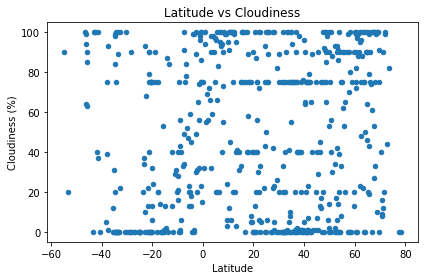

In [17]:
def plot_lat_v_cloud(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.cloudiness)
    plt.title("Latitude vs Cloudiness")
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")

plot_lat_v_cloud(final_city_data)
plt.tight_layout()
savefig("lat_v_cloud")
plt.show()

## Latitude vs. Wind Speed Plot

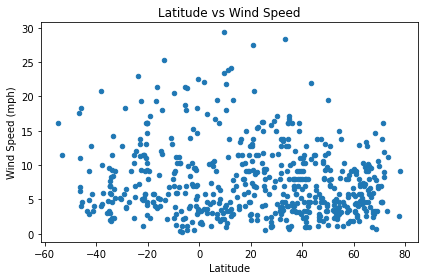

In [18]:
def plot_lat_v_wind(df):
    df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.wind_speed)
    plt.title("Latitude vs Wind Speed")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")

plot_lat_v_wind(final_city_data)
plt.tight_layout()
savefig("lat_v_wind")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_lin_reg(dataframe, x_col, y_col):
    x_values = dataframe[x_col]
    y_values = dataframe[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    eq_label = f"{equation} \nr-squared = {round(rvalue * rvalue, 3)}"
    regress_plot, = plt.plot(x_values, regress_values, "r-", label=eq_label)
    plt.legend(handles=[regress_plot], loc="best")
    print(f"The r-squared value is {rvalue * rvalue}")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] >= 0]
north_df.head()

,City,country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kenai,US,60.55,-151.26,55.99,87,90,3.36
2,Bowling Green,US,36.99,-86.44,84.20,66,90,8.05
4,Kavaratti,IN,10.57,72.64,80.01,85,100,17.96
9,Redlands,US,34.06,-117.18,89.01,20,5,9.17
11,Albany,US,42.60,-73.97,89.01,41,65,3.20


In [21]:
south_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] < 0]
south_df.head()

,City,country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pitimbu,BR,-7.47,-34.81,75.20,83,49,10.29
3,New Norfolk,AU,-42.78,147.06,42.01,83,100,2.86
5,Mahébourg,MU,-20.41,57.70,68.00,56,75,16.11
6,Saint-Philippe,RE,-21.36,55.77,66.20,63,90,11.41
7,Alofi,NU,-19.06,-169.92,77.00,78,75,17.22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.4603128867526087


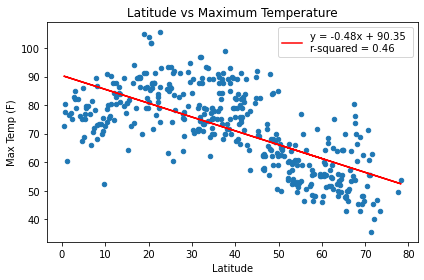

In [22]:
plot_lat_v_temp(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("north_lat_v_temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6581388028181901


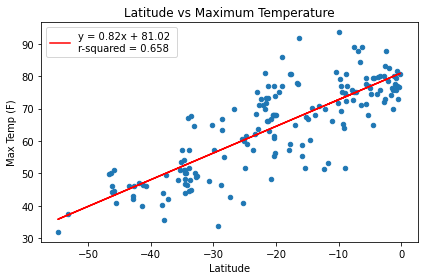

In [23]:
plot_lat_v_temp(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("south_lat_v_temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0027181254377244522


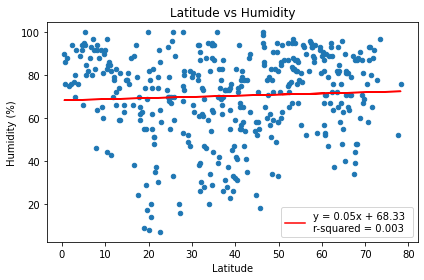

In [24]:
plot_lat_v_humid(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("north_lat_v_humid")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0021848543370742795


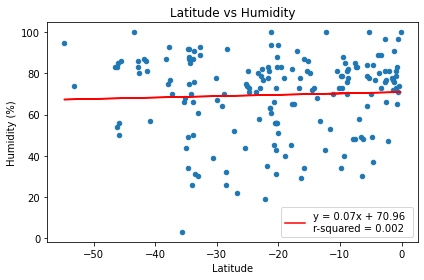

In [25]:
plot_lat_v_humid(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("south_lat_v_humid")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0001087973226282062


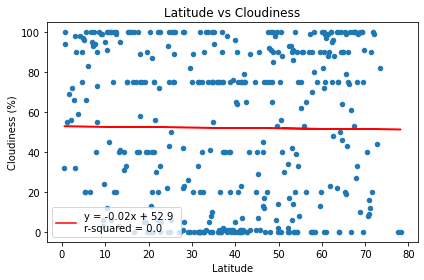

In [26]:
plot_lat_v_cloud(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("north_lat_v_cloud")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 4.93631823297853e-06


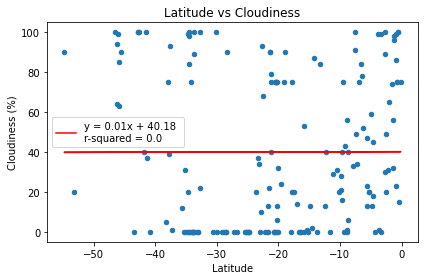

In [27]:
plot_lat_v_cloud(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("south_lat_v_cloud")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.025366598844332504


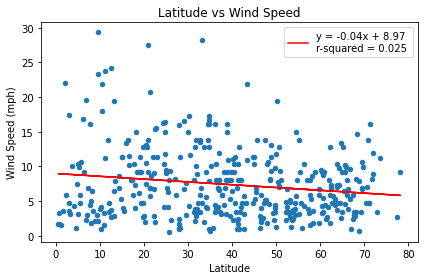

In [28]:
plot_lat_v_wind(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
savefig("north_lat_v_wind")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0003979550778471292


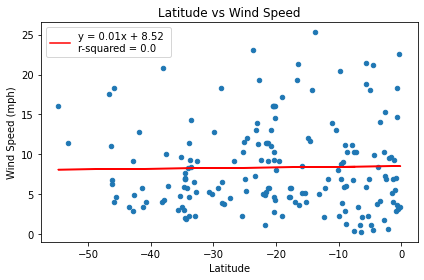

In [29]:
plot_lat_v_wind(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
savefig("south_lat_v_wind")
plt.show()

## Observations

### There is some correlation between latitude and maximum temperature.
For both the Nothern and Southern Hemispheres, there is some correlation between latitude and temperature.  In both, there is a greater than 0.45 r-squared value.  It's not perfect, but it's a decent correlation.

### Not much correlation between wind speed, cloudiness, and humidity and latitude

Latitude when compared to wind speed, cloudiness, and humidity doesn't appear to have much correlation.  This means that it's hard to find a trend between latitude and those three weather attributes.

For each of the graphs above, they all have less than 0.05 r-squared value in both the Northern and Southern Hemispheres.

### Max temperatures rise as the latitude approaches 0
When looking at the graphs for the max temperatures versus the latitude, both the Northern and Southern Hemisphere graphs show that as the latitude approaches 0, then the temperatures rise.  This makes sense since 0 degrees latitude is the equater, where temperatures are typically hot.  It's nice to see this reflected in our graphs.